Example of how to fit a non-linear dataset using polynomial regression with multiple features with scikit-learn.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100,1)*10)
x_2 = np.absolute(np.random.randn(100,1)*30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20
print(x_1.shape)
print(x_2.shape)
print(y.shape)

(100, 1)
(100, 1)
(100, 1)


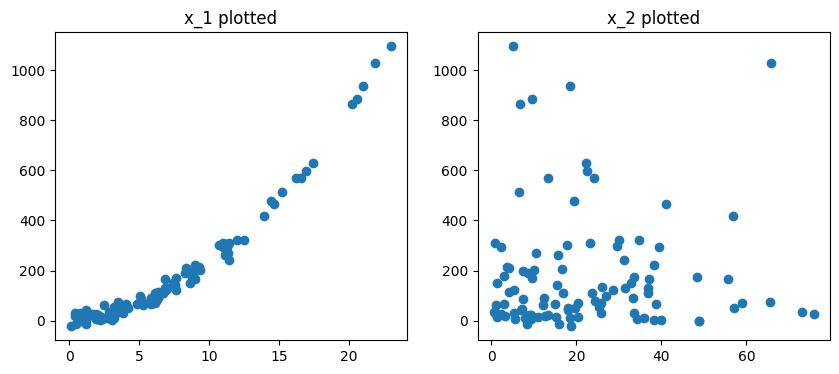

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [6]:
#stored the values in a datafram
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


In [7]:
X, y = df[["x_1", "x_2"]], df["y"] #From df, we save the x_1 and x_2 columns to X, the y column to y
print(X)

          x_1        x_2
0   16.243454  13.413857
1    6.117564  36.735231
2    5.281718  12.104749
3   10.729686  17.807356
4    8.654076  32.847355
..        ...        ...
95   0.773401  48.823150
96   3.438537  18.069578
97   0.435969  12.608466
98   6.200008  24.328550
99   6.980320  31.333263

[100 rows x 2 columns]


In [8]:
#Polynomial: y = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1^2 + w_4*x_2^2 + w_5*x_1*x_2
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
print(poly_features) #columns: x_1, x_2, x_1^2, x_1*x_2, x_2^2

[[1.62434536e+01 1.34138569e+01 2.63849786e+02 2.17887363e+02
  1.79931558e+02]
 [6.11756414e+00 3.67352311e+01 3.74245910e+01 2.24730133e+02
  1.34947721e+03]
 [5.28171752e+00 1.21047493e+01 2.78965400e+01 6.39338662e+01
  1.46524954e+02]
 [1.07296862e+01 1.78073557e+01 1.15126166e+02 1.91067339e+02
  3.17101917e+02]
 [8.65407629e+00 3.28473554e+01 7.48930365e+01 2.84263519e+02
  1.07894875e+03]
 [2.30153870e+01 5.08147299e+00 5.29708037e+02 1.16952067e+02
  2.58213678e+01]
 [1.74481176e+01 2.22166935e+01 3.04436809e+02 3.87639482e+02
  4.93581472e+02]
 [7.61206901e+00 2.86110181e+01 5.79435946e+01 2.17789044e+02
  8.18590354e+02]
 [3.19039096e+00 7.98655518e+00 1.01785945e+01 2.54802335e+01
  6.37850636e+01]
 [2.49370375e+00 9.78436401e-01 6.21855842e+00 2.43993053e+00
  9.57337790e-01]
 [1.46210794e+01 4.11935196e+01 2.13775962e+02 6.02293720e+02
  1.69690606e+03]
 [2.06014071e+01 9.45478176e+00 4.24417974e+02 1.94781808e+02
  8.93928982e+01]
 [3.22417204e+00 2.53848194e+01 1.039528

In [9]:
#30% allocated to test our model
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [10]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [11]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)

Mean square error. The root of mean square error, is RMSE, which is a commonly used metric to evaluate a machine learning model’s performance. RMSE shows how far the values your model predicts (poly_reg_y_predicted) are from the true values (y_test), on average. Roughly speaking: the smaller the RMSE, the better the model.

In [12]:
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse)

20.937707839078772


In [15]:
#Linear model: y = w_0 + w_1*x_1 + w_2*x_2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model_y_pred = lin_model.predict(X_test)
lin_model_rmse = np.sqrt(mean_squared_error(y_test, lin_model_y_pred))
print(lin_model_rmse)

62.302487453878506


In [17]:
print(f"Linear Model coeficients, W:{lin_model.coef_}, b = {lin_model.intercept_} ")
print(f"Polynomial Model coeficients, w1, w_2, w_3, w_4, w_5:{poly_reg_model.coef_} ")

Linear Model coeficients, W:[43.73176255 -0.53140809], b = -117.07280081594811 
Polynomial Model coeficients, w1, w_2, w_3, w_4, w_5:[ 3.61945509 -1.0859955   1.89905813  0.0207338   0.01300394] 
